In [4]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# path to json
DATA_PATH = "/content/drive/MyDrive/Dl project/genres_original/data_10.json"

In [10]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [11]:
# load data
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [12]:
X.shape

(9986, 130, 13)

In [13]:
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Simple ANN

In [19]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(11, activation='softmax')
])

In [20]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1690)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               865792    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 11)                715       
                                                                 
Total params: 1,014,283
Trainable params: 1,014,283
Non-trainable params: 0
_________________________________________________________________


In [22]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/50
219/219 [==============================] - 7s 29ms/step - loss: 7.6020 - accuracy: 0.3187 - val_loss: 3.3570 - val_accuracy: 0.3692
Epoch 2/50
219/219 [==============================] - 6s 27ms/step - loss: 2.5383 - accuracy: 0.4189 - val_loss: 2.5775 - val_accuracy: 0.3845
Epoch 3/50
219/219 [==============================] - 6s 28ms/step - loss: 1.8374 - accuracy: 0.4858 - val_loss: 2.2122 - val_accuracy: 0.4286
Epoch 4/50
219/219 [==============================] - 6s 27ms/step - loss: 1.4795 - accuracy: 0.5438 - val_loss: 1.9948 - val_accuracy: 0.4429
Epoch 5/50
219/219 [==============================] - 5s 24ms/step - loss: 1.2731 - accuracy: 0.5830 - val_loss: 2.1138 - val_accuracy: 0.4519
Epoch 6/50
219/219 [==============================] - 6s 26ms/step - loss: 1.1492 - accuracy: 0.6229 - val_loss: 1.8339 - val_accuracy: 0.4820
Epoch 7/50
219/219 [==============================] - 4s 20ms/step - loss: 0.9583 - accuracy: 0.6692 - val_loss: 1.8938 - val_accuracy: 0.4843

In [23]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

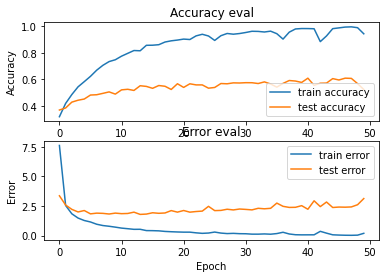

In [24]:
# plot accuracy and error as a function of the epochs
plot_history(history)

Managing Overfitting

In [28]:
# build network topology
model_regularized = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(11, activation='softmax')
])

In [29]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
# train model
history = model_regularized.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
219/219 [==============================] - 6s 27ms/step - loss: 24.0709 - accuracy: 0.1559 - val_loss: 3.9174 - val_accuracy: 0.2530
Epoch 2/100
219/219 [==============================] - 7s 30ms/step - loss: 7.2467 - accuracy: 0.1742 - val_loss: 3.4857 - val_accuracy: 0.1989
Epoch 3/100
219/219 [==============================] - 7s 33ms/step - loss: 4.8416 - accuracy: 0.1710 - val_loss: 3.4621 - val_accuracy: 0.1862
Epoch 4/100
219/219 [==============================] - 7s 31ms/step - loss: 4.0297 - accuracy: 0.1804 - val_loss: 3.4708 - val_accuracy: 0.1632
Epoch 5/100
219/219 [==============================] - 7s 30ms/step - loss: 3.8085 - accuracy: 0.1959 - val_loss: 3.4249 - val_accuracy: 0.1899
Epoch 6/100
219/219 [==============================] - 7s 30ms/step - loss: 3.6697 - accuracy: 0.2037 - val_loss: 3.4007 - val_accuracy: 0.2033
Epoch 7/100
219/219 [==============================] - 7s 32ms/step - loss: 3.5594 - accuracy: 0.2080 - val_loss: 3.3851 - val_accuracy

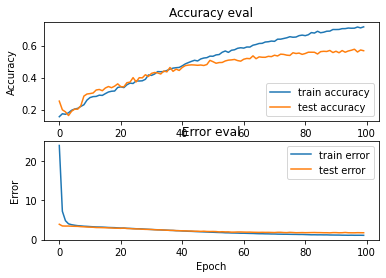

In [31]:
# plot accuracy and error as a function of the epochs
plot_history(history)

Convolutional Neural Network

In [32]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [33]:
X_train.shape

(5991, 130, 13, 1)

In [34]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [39]:
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(11, activation='softmax'))

In [40]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
model_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 6, 32)        0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 64, 6, 32)        128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 2, 32)        0         
 2D)                                                             
                                                      

In [42]:
# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

Epoch 1/50
188/188 [==============================] - 14s 70ms/step - loss: 2.4186 - accuracy: 0.2307 - val_loss: 1.9161 - val_accuracy: 0.3438
Epoch 2/50
188/188 [==============================] - 14s 72ms/step - loss: 1.8931 - accuracy: 0.3529 - val_loss: 1.6228 - val_accuracy: 0.4366
Epoch 3/50
188/188 [==============================] - 13s 69ms/step - loss: 1.6823 - accuracy: 0.4175 - val_loss: 1.4760 - val_accuracy: 0.4953
Epoch 4/50
188/188 [==============================] - 13s 70ms/step - loss: 1.5563 - accuracy: 0.4605 - val_loss: 1.4021 - val_accuracy: 0.5060
Epoch 5/50
188/188 [==============================] - 13s 70ms/step - loss: 1.4666 - accuracy: 0.4902 - val_loss: 1.3398 - val_accuracy: 0.5214
Epoch 6/50
188/188 [==============================] - 13s 69ms/step - loss: 1.3891 - accuracy: 0.5104 - val_loss: 1.2827 - val_accuracy: 0.5387
Epoch 7/50
188/188 [==============================] - 13s 71ms/step - loss: 1.3459 - accuracy: 0.5386 - val_loss: 1.2420 - val_accuracy:

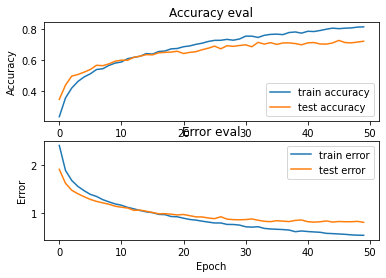

In [43]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [44]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 1s - loss: 0.7853 - accuracy: 0.7269 - 1s/epoch - 13ms/step

Test accuracy: 0.7268722653388977


In [45]:
model_cnn.save("Music_Genre_10_CNN")

INFO:tensorflow:Assets written to: Music_Genre_10_CNN/assets


In [46]:
model_cnn.save("Music_Genre_10_CNN.h5")

In [47]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("Music_Genre_10_CNN.h5")

Prediction on Test Set

In [48]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

In [49]:
X_to_predict.shape

(130, 13, 1)

In [50]:
print("Real Genre:", y_to_predict)

Real Genre: 9


In [51]:
# add a dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)

In [52]:
X_to_predict.shape

(1, 130, 13, 1)

In [53]:
# perform prediction
prediction = model_cnn.predict(X_to_predict)

In [54]:
# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Predicted Genre: 9


In [55]:
# pick a sample to predict from the test set
X_to_predict = X_test[50]
y_to_predict = y_test[50]

print("Real Genre:", y_to_predict)

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Real Genre: 0
Predicted Genre: 0


In [56]:
len(X_test)

2497

In [57]:
for n in range(10):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))


Real Genre: 9
Predicted Genre: 10

Real Genre: 5
Predicted Genre: 5

Real Genre: 8
Predicted Genre: 8

Real Genre: 2
Predicted Genre: 2

Real Genre: 9
Predicted Genre: 9

Real Genre: 9
Predicted Genre: 8

Real Genre: 3
Predicted Genre: 3

Real Genre: 1
Predicted Genre: 1

Real Genre: 10
Predicted Genre: 10

Real Genre: 10
Predicted Genre: 9


Prediction on New Songs

In [58]:
# Audio files pre-processing
def process_input(audio_file, track_duration):

  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FTT=2048
  HOP_LENGTH=512
  TRACK_DURATION = track_duration # measured in seconds
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS = 10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)
  
  for d in range(10):

    # calculate start and finish sample for current segment
    start = samples_per_segment * d
    finish = start + samples_per_segment

    # extract mfcc
    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T

    return mfcc

In [59]:
genre_dict = {0:"hiphop",1:"country",2:"jazz",3:"classical",4:"metal",5:"pop",6:"rock",7:"blues",8:"reggae",9:"disco"}

In [63]:
new_input_mfcc = process_input("/content/drive/MyDrive/Dl project/genres_original/file_example_WAV_1MG.wav", 30)

In [64]:
type(new_input_mfcc)

numpy.ndarray

In [65]:
new_input_mfcc.shape

(130, 13)

In [66]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 130, 13, 1)

In [67]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

Predicted Genre: jazz


In [69]:
new_input_mfcc = process_input("/content/drive/MyDrive/Dl project/genres_original/StarWars60.wav", 30)

In [70]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 130, 13, 1)

In [71]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

Predicted Genre: pop
